In [20]:
import pandas as pd
import numpy as np
import gensim
import os
from gensim.models.doc2vec import *
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorlover as cl
from IPython.display import HTML
from keras import regularizers
from keras.layers import Dropout
from keras import optimizers
import ipywidgets as widgets
from collections import Counter
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
vectorized_df = pd.read_csv('document_vectors_df.csv', index_col = 0)
vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,author,sex,period
0,-1.970910,0.848074,-0.440028,0.857539,-0.124459,-0.851813,0.138067,-3.733878,-1.866872,-0.703593,...,0.659864,-0.437961,0.722089,0.347195,1.313847,2.680759,-0.379815,MaryWollstonecraft,female,enlightenment
1,-0.510864,-0.622333,-0.736651,0.613865,0.368931,-0.391960,-0.469377,-2.290867,-0.881997,-0.096872,...,-0.259618,0.989194,0.650732,-0.696870,0.742644,1.306955,2.271753,MaryWollstonecraft,female,enlightenment
2,-1.192763,-0.101330,-2.033015,-0.657394,-2.957540,-1.393376,0.922216,-1.949090,0.973241,-0.010799,...,1.731215,-2.687085,1.006650,0.577892,-2.256335,-0.870119,1.854182,MaryWollstonecraft,female,enlightenment
3,-1.638204,2.475540,2.761713,-0.208285,1.245777,-1.857539,1.301273,-0.596133,-0.471881,1.390386,...,-0.255897,0.055352,1.467543,0.755759,1.035357,0.322843,1.942936,MaryWollstonecraft,female,enlightenment
4,-3.274428,-0.990834,-2.353368,1.261691,-2.174409,-0.996711,1.268803,-2.305384,0.418952,1.774418,...,2.602762,-0.780936,1.422385,-1.050799,-0.209620,-0.086764,1.308790,MaryWollstonecraft,female,enlightenment


In [3]:
authors = list(set((vectorized_df['author'])))
genders = list(set((vectorized_df['sex'])))
periods = list(set((vectorized_df['period'])))

In [5]:
# create author, gender, period dictionaries for mapping 
num = list(range(0,len(authors)))
author_num = dict(zip(authors, num))

num_gen = list(range(0,len(genders)))
sex_num = dict(zip(genders, num_gen))

num_period = list(range(0,len(periods)))
period_num = dict(zip(periods, num_period))

In [7]:
vectorized_df['sex'] = vectorized_df['sex'].map(sex_num)
vectorized_df['author'] = vectorized_df['author'].map(author_num)
vectorized_df['period'] = vectorized_df['period'].map(period_num)

In [9]:
X = vectorized_df.drop(['author', 'sex', 'period'], axis = 1)
y_author = vectorized_df['author']
y_period = vectorized_df['period']

In [43]:
X_train_author, X_test_author, y_train_author, y_test_author = train_test_split(X, y_author)
X_train_period, X_test_period, y_train_period, y_test_period = train_test_split(X, y_period)

In [52]:
freq_train_author = [sum(y_train_author == i) for i in range(0, len(authors))]
freq_test_author = [sum(y_test_author == i) for i in range(0, len(authors))]
freq_train_period = [sum(y_train_period == i) for i in range(0, len(periods))]
freq_test_period = [sum(y_test_period == i) for i in range(0, len(periods))]

<IPython.core.display.Javascript object>


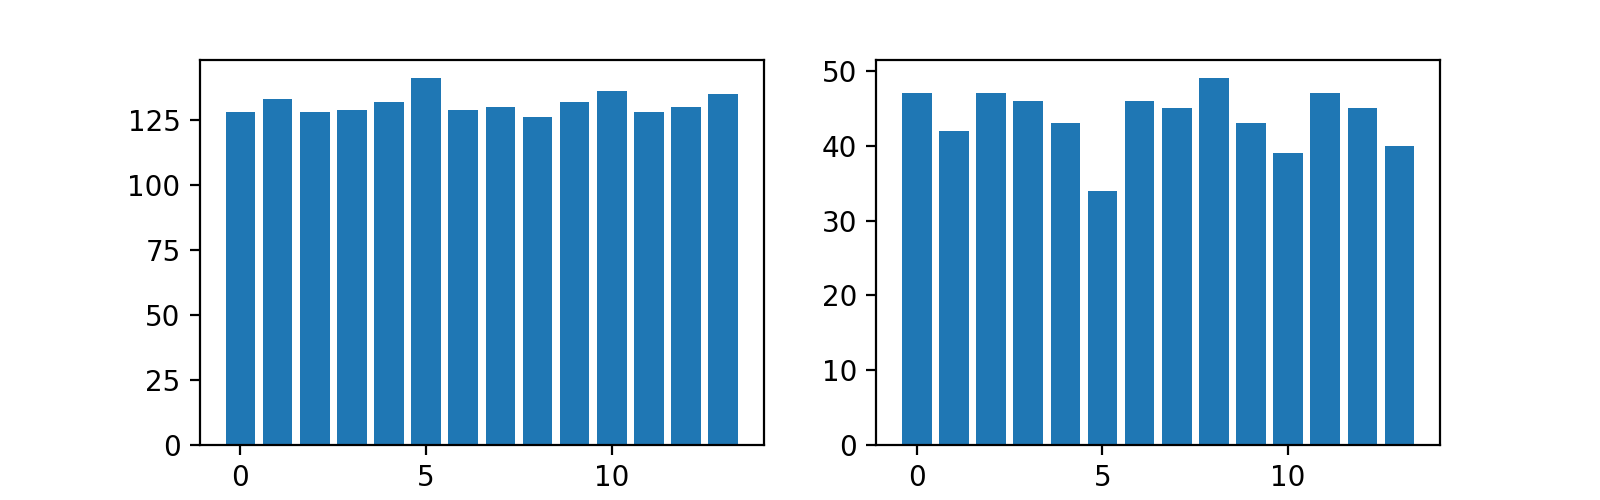

In [51]:
# checking the class inbalance
%matplotlib notebook
plt.figure(figsize = (8,2.5))
plt.subplot(121)
plt.bar(list(range(0,len(authors))), freq_train_author)
plt.show()
plt.subplot(122)
plt.bar(list(range(0,len(authors))), freq_test_author)
plt.show()

<IPython.core.display.Javascript object>


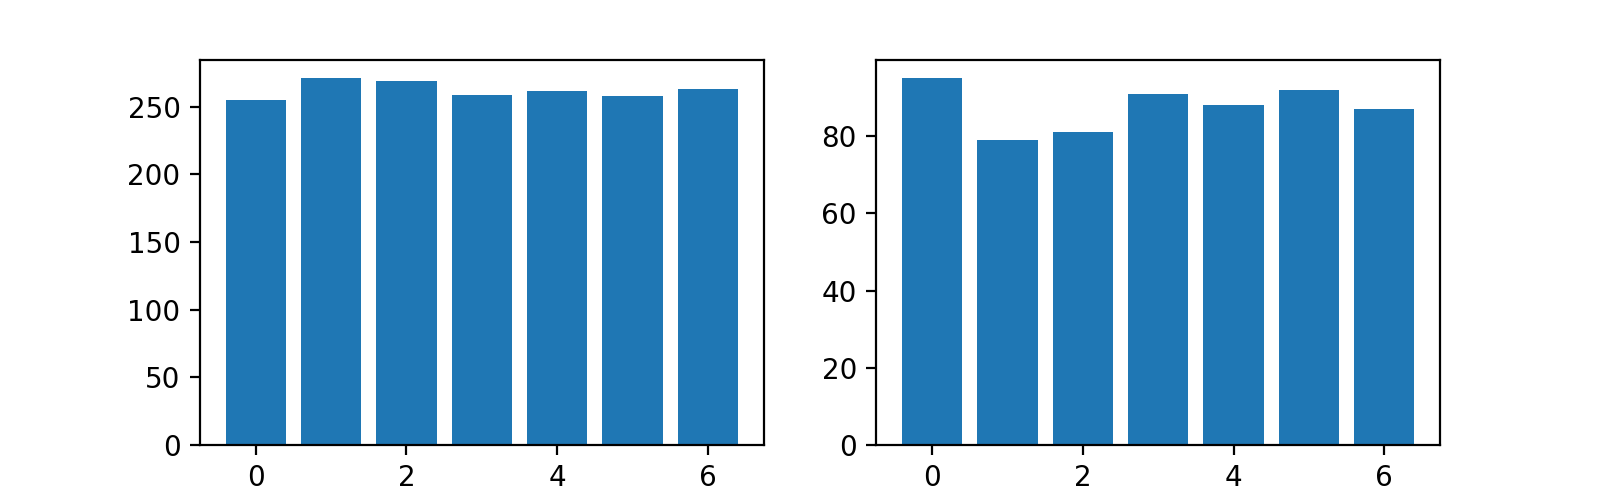

In [53]:
# checking the class inbalance
%matplotlib notebook
plt.figure(figsize = (8,2.5))
plt.subplot(121)
plt.bar(list(range(0,len(periods))), freq_train_period)
plt.show()
plt.subplot(122)
plt.bar(list(range(0,len(periods))), freq_test_period)
plt.show()

### Shallow Learning Classifiers
#### K - Nearest Neighbors
- Author Classification

In [69]:
n_neighbors = 100

scores = []
for weight in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weight)
    clf.fit(X_train_author, y_train_author)
    y_hat = clf.score(X_train_author, y_train_author)
    scores.append(y_hat)

In [70]:
scores

[0.5264017419706043, 1.0]